In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [169]:
IMRcal = pd.read_xml('F:/AFKABAN/BroadbandHerring/calibration.xml', xpath='.//case', parser='lxml')



In [170]:
IMRcal

,id,kHz,g,beamWidthAlong,beamWidthAthwart,angleOffsetAlong,angleOffsetAthwart,SA,broadband,hz,albw,atbw,alao,atao
0,WBT 580729-15 ES38D,38.0,25.27,7.06,7.04,-0.11,-0.02,"256:0.01, 512:0.01, 1024:0.01, 2048:0.01, 4096...",NaN,NaN,NaN,NaN,NaN,NaN
1,WBT 582228-15 ES120-7CD,120.0,27.10,6.91,6.76,-0.11,-0.01,"64:-0.02, 128:-0.02, 256:-0.02, 512:-0.02, 102...",NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,25.38,NaN,NaN,NaN,NaN,None,NaN,93363.0,NaN,NaN,NaN,NaN
3,None,NaN,25.41,NaN,NaN,NaN,NaN,None,NaN,93844.0,NaN,NaN,NaN,NaN
4,None,NaN,25.25,NaN,NaN,NaN,NaN,None,NaN,94324.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,85901.0,NaN,NaN,NaN,-0.02
1566,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,86391.0,NaN,NaN,NaN,-0.03
1567,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,86882.0,NaN,NaN,NaN,-0.03
1568,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,87372.0,NaN,NaN,NaN,-0.02


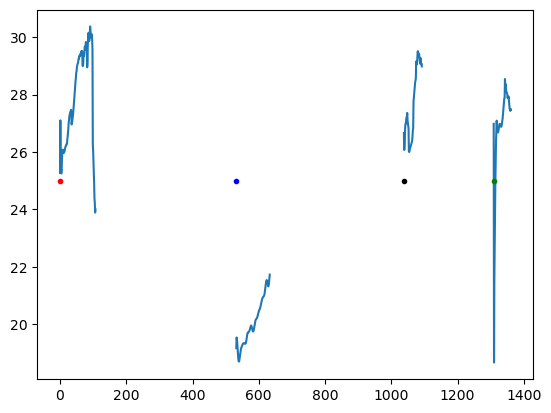

In [177]:
#identify order
nd_120 = np.where(IMRcal.kHz==120)[0][0]
ind_38 = np.where(IMRcal.kHz==38)[0][1]
ind_200  = np.where(IMRcal.kHz==200)[0][0]
ind_70  = np.where(IMRcal.kHz==70)[0][0]


plt.plot(IMRcal.index, IMRcal.g)
plt.plot(ind_120, 25, 'r.')
plt.plot(ind_38, 25, 'b.')
plt.plot(ind_200, 25, 'k.')
plt.plot(ind_70, 25, 'g.')

### Split into two dataframes to avoid selecting with overlap

In [172]:

params_list = ['hz','g','albw','atbw','alao','atao']

In [206]:
IMRcal_120 = IMRcal.iloc[ind_120+1:ind_38]
IMRcal_120 = IMRcal_120[params_list].groupby('hz').mean()
IMRcal_120 = IMRcal_120.reset_index()


In [207]:
IMRcal_200 = IMRcal.iloc[ind_200+1:ind_70]
IMRcal_200 = IMRcal_200[params_list].groupby('hz').mean()
IMRcal_200 = IMRcal_200.reset_index()

In [208]:
(IMRcal_120['hz'].tolist())

[93363.0,
 93844.0,
 94324.0,
 94805.0,
 95285.0,
 95766.0,
 96246.0,
 96727.0,
 97207.0,
 97688.0,
 98168.0,
 98649.0,
 99129.0,
 99610.0,
 100090.0,
 100571.0,
 101051.0,
 101532.0,
 102012.0,
 102492.0,
 102973.0,
 103453.0,
 103934.0,
 104414.0,
 104895.0,
 105375.0,
 105856.0,
 106336.0,
 106817.0,
 107297.0,
 107778.0,
 108258.0,
 108739.0,
 120270.0,
 120751.0,
 121231.0,
 121712.0,
 122192.0,
 122673.0,
 123153.0,
 123634.0,
 124114.0,
 124595.0,
 125075.0,
 125556.0,
 126036.0,
 126517.0,
 126997.0,
 127477.0,
 127958.0,
 128438.0,
 128919.0,
 129399.0,
 129880.0,
 130360.0,
 130841.0,
 131321.0,
 131802.0,
 132282.0,
 132763.0,
 133243.0,
 133724.0,
 134204.0,
 134685.0,
 135165.0,
 135646.0,
 143333.0,
 143814.0,
 144294.0,
 144775.0,
 145255.0,
 145736.0,
 146216.0,
 146697.0,
 147177.0,
 147658.0,
 148138.0,
 148619.0,
 149099.0,
 149580.0,
 150060.0,
 150541.0,
 151021.0,
 151502.0,
 151982.0,
 152462.0,
 152943.0,
 153423.0,
 153904.0,
 154384.0,
 154865.0,
 155345.0,
 1

In [210]:
for params in params_list:
    print(params)
    param_print = IMRcal_200[params].tolist()
    param_print = "; ".join(map(str,param_print))
    print(param_print)

hz
168008.0; 169009.0; 170010.0; 171011.0; 172012.0; 173013.0; 174014.0; 175015.0; 176016.0; 177017.0; 178018.0; 179019.0; 180020.0; 181021.0; 191031.0; 192032.0; 193033.0; 194034.0; 195035.0; 196036.0; 197037.0; 198038.0; 199039.0; 200040.0; 201041.0; 202042.0; 203043.0; 204044.0; 211051.0; 212052.0; 213053.0; 214054.0; 215055.0; 216056.0; 217057.0; 218058.0; 222062.0; 223063.0; 224064.0; 225065.0; 234074.0; 235075.0; 236076.0; 237077.0; 238078.0; 239079.0; 240080.0; 241081.0; 242082.0; 243083.0; 244084.0; 245085.0; 246086.0; 247087.0
g
26.07; 26.27; 26.58; 26.9; 26.99; 26.99; 27.14; 27.21; 27.21; 27.36; 27.1; 27.0; 26.92; 26.82; 26.01; 26.0; 26.03; 26.11; 26.14; 26.19; 26.23; 26.26; 26.31; 26.37; 26.4; 26.6; 26.74; 26.83; 27.76; 27.9; 28.05; 28.17; 28.36; 28.44; 28.49; 28.57; 29.15; 29.04; 29.12; 29.13; 29.38; 29.51; 29.33; 29.45; 29.38; 29.4; 29.32; 29.19; 29.08; 29.27; 29.17; 29.05; 29.08; 28.98
albw
7.8; 8.02; 8.02; 7.75; 7.95; 8.29; 8.06; 8.16; 8.33; 8.19; 8.05; 8.06; 8.15; 8.01;

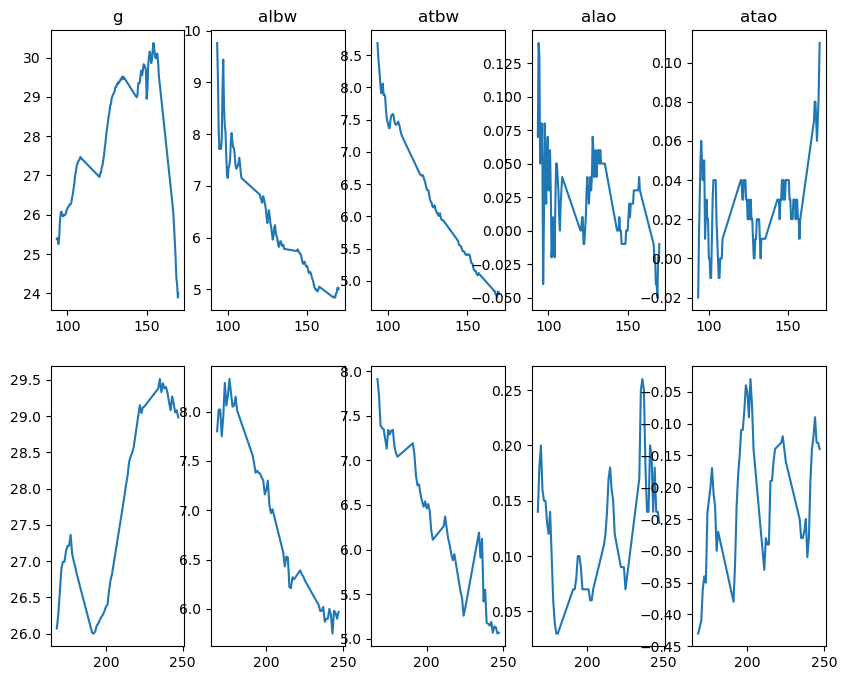

In [222]:
fig,ax = plt.subplots(2,5,figsize=(10,8))


for i , params in enumerate(params_list[1:]):
    ax[0,i].plot(IMRcal_120.hz/1000,IMRcal_120[params])
    ax[1,i].plot(IMRcal_200.hz/1000,IMRcal_200[params])
    ax[0,i].set_title(params)